In [1]:
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import glob
import xesmf as xe
import cartopy.feature as feature
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
import cartopy.feature as feature

In [2]:
new_lat=np.arange(-90,90.5,0.5)


In [3]:
len(new_lat)

361

In [4]:
new_lon=np.arange(0,360.1,0.5)
len(new_lon)

721

In [2]:
# Define new latitudes and longitudes
new_lat = np.arange(-90, 90.5, 1)
new_lon = np.arange(0, 360.1, 1)
print(len(new_lon))
print(len(new_lat))
# Define output directories
#source_dir = "/scratch/asarker3/clim680/data2/"
target_dir = "/scratch/asarker3/clim680/conv_data_181/"

# Loop through tos1 to tos10
for i in [6,8]:
    file_name = f"tos{i}.nc"
    #source_path = source_dir + file_name
    target_path = target_dir + file_name
    
    # Copy file to the working directory
    #shutil.copy(file_name, source_path)
    #cp file_name source_dir
    
    # Open dataset
    ds = xr.open_dataset(file_name)
    
    # Create a new grid
    ds_out = xr.Dataset({
        'lat': (['lat'], new_lat),
        'lon': (['lon'], new_lon)
    })

    # Perform regridding
    regridder = xe.Regridder(ds, ds_out, 'bilinear', ignore_degenerate=True)
    dr_out = regridder(ds['tos']).to_dataset(name='tos')
    
    # Save the regridded dataset
    dr_out.to_netcdf(target_path)
    
    print(f"Processed {file_name} successfully.")

361
181


/home/asarker3/.conda/envs/clim_data/lib/python3.10/site-packages/xarray/backends/plugins.py:65: RuntimeWarning: Engine 'gini' loading failed:
cannot import name 'deprecated' from 'typing_extensions' (/home/asarker3/.conda/envs/clim_data/lib/python3.10/site-packages/typing_extensions.py)
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


Processed tos6.nc successfully.
Processed tos8.nc successfully.


In [7]:
pwd

'/home/asarker3/clim680/project'

In [3]:
target_dir = "/scratch/asarker3/clim680/conv_data_181/"
# Define new latitudes and longitudes
new_lat = np.arange(-90, 90.5, 1)
new_lon = np.arange(0, 360.1, 1)
print(len(new_lon))
print(len(new_lat))

file_name = "picontrol2.nc"
#source_path = source_dir + file_name
target_path = target_dir + file_name

# Copy file to the working directory
#shutil.copy(file_name, source_path)
#cp file_name source_dir

# Open dataset
ds = xr.open_dataset(file_name)

# Create a new grid
ds_out = xr.Dataset({
    'lat': (['lat'], new_lat),
    'lon': (['lon'], new_lon)
})

# Perform regridding
regridder = xe.Regridder(ds, ds_out, 'bilinear', ignore_degenerate=True)
dr_out = regridder(ds['tos']).to_dataset(name='tos')

# Save the regridded dataset
dr_out.to_netcdf(target_path)

print(f"Processed {file_name} successfully.")

361
181


/home/asarker3/.conda/envs/clim_data/lib/python3.10/site-packages/xarray/coding/times.py:526: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/home/asarker3/.conda/envs/clim_data/lib/python3.10/site-packages/xarray/core/indexing.py:422: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


Processed picontrol2.nc successfully.


In [16]:
monthly_mean = dr_out.groupby('time.month').mean(dim='time')
max_value = monthly_mean.max()
min_value = monthly_mean.min()
print(f"Maximum value: {max_value}")
print(f"Minimum value: {min_value}")

Maximum value: <xarray.Dataset>
Dimensions:  ()
Data variables:
    tos      float64 32.46
Minimum value: <xarray.Dataset>
Dimensions:  ()
Data variables:
    tos      float64 -1.929


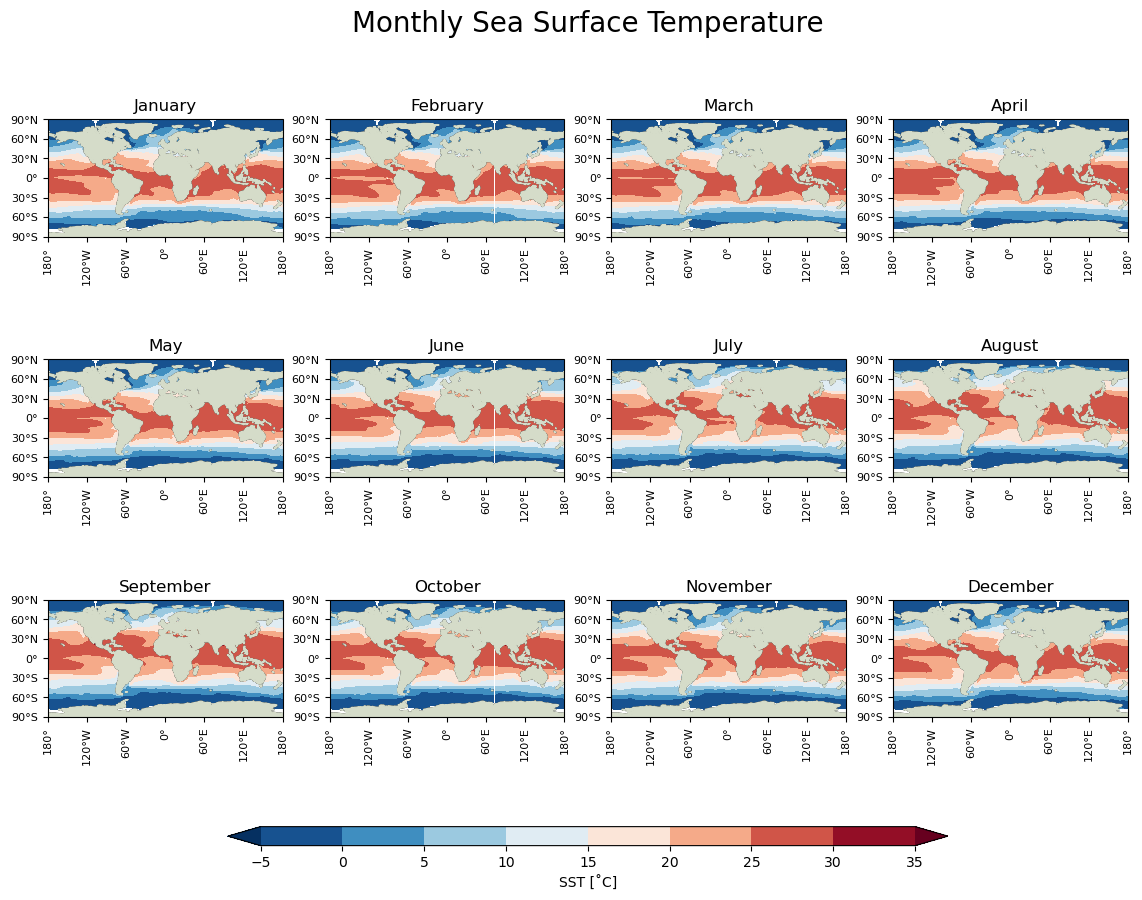

In [17]:
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# Create the figure with 3 rows and 4 columns for the 12 months
fig, axs = plt.subplots(nrows=3, ncols=4,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(12, 9.5))

# Flatten axs to iterate over the subplots
axs = axs.flatten()

# Loop through each month, selecting the corresponding data and plotting
for i, month in enumerate(monthly_mean['month']):
    # Select data for the month
    data = monthly_mean['tos'].sel(month=month)

    # Add the cyclic point to avoid a gap in the map
    data, lons = add_cyclic_point(data, coord=monthly_mean['lon'])

    # Plot contour for each month
    cs = axs[i].contourf(lons, monthly_mean['lat'], data, 
                         levels=np.arange(-5, 36, 5), 
                         transform=ccrs.PlateCarree(),
                         cmap='RdBu_r', extend='both')

    # Set the title for each subplot
    axs[i].set_title(month_names[i])

    # Add coastlines and land color
    axs[i].coastlines()
    axs[i].add_feature(feature.LAND, zorder=2, color='#D5DCC9')

    # Longitude labels
    axs[i].set_xticks(np.arange(-180, 181, 60), crs=ccrs.PlateCarree())
    lon_formatter = cticker.LongitudeFormatter()
    axs[i].xaxis.set_major_formatter(lon_formatter)
    axs[i].tick_params(axis='x', rotation=90, labelsize=8)
    
    # Latitude labels
    axs[i].set_yticks(np.arange(-90, 91, 30), crs=ccrs.PlateCarree())
    lat_formatter = cticker.LatitudeFormatter()
    axs[i].yaxis.set_major_formatter(lat_formatter)
    axs[i].tick_params(axis='y', labelsize=8) 

# Adjust layout for colorbar
fig.subplots_adjust(bottom=0.2, top=0.9, left=0.05, right=0.95,
                    wspace=0.2, hspace=0.3)

# Add a colorbar at the bottom of the figure
cbar_ax = fig.add_axes([0.2, 0.1, 0.6, 0.02])
cbar = fig.colorbar(cs, cax=cbar_ax, orientation='horizontal', label="SST [˚C]")

# Add a main title
plt.suptitle('Monthly Sea Surface Temperature', fontsize=20)

plt.show()

In [3]:
pwd

'/home/asarker3/clim680/project'